# Setup

In [1]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Fraud-Detection.git

import sys
sys.path.append('/content/Fraud-Detection.git/')
%cd /content/Fraud-Detection/
!pwd
!ls

Mounted at /content/drive
✅ GITHUB_PAT loaded successfully
Cloning into 'Fraud-Detection'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 16.63 KiB | 16.63 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Fraud-Detection
/content/Fraud-Detection
Data  LICENSE  README.md


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import joblib

In [3]:
file_path = '/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Variant II.csv/fifar_variant_II.csv'

try:
  df = pd.read_csv(file_path)
  print("Successfully loaded data from Google Drive.")
  print(df.head())
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")


Successfully loaded data from Google Drive.
   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.7               0.062288                         -1   
1           0     0.9               0.098433                         -1   
2           0     0.6               0.116962                         -1   
3           0     0.3               0.059078                         10   
4           0     0.1               0.689959                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            24            50            0.016740   
1                           310            50            0.019002   
2                           189            60            0.047064   
3                            40            60            0.008007   
4                           128            30            2.513544   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0           

In [9]:
file_path = '/content/drive/My Drive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/X_scaled.pkl'

try:
    X_scaled = joblib.load(file_path)
    print("X_scaled loaded successfully!")
    print(X_scaled)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

X_scaled loaded successfully!
[[ 0.43445366 -1.46291765 -0.36604267 ...  1.          0.
   0.        ]
 [ 1.1270507  -1.33888985 -0.36604267 ...  0.          0.
   0.        ]
 [ 0.08815514 -1.27531273 -0.36604267 ...  1.          0.
   0.        ]
 ...
 [ 0.43445366  0.80381346 -0.36604267 ...  1.          0.
   0.        ]
 [ 1.1270507   1.70294079 -0.36604267 ...  0.          0.
   0.        ]
 [ 0.78075218  1.31241669 -0.36604267 ...  1.          0.
   0.        ]]


In [10]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

df['gmm_cluster'] = gmm_labels

# Interpretation

## Check fraud rate per cluster

In [12]:
fraud_rate_by_cluster = df.groupby('gmm_cluster')['fraud_bool'].mean().sort_values(ascending=False)
print("Fraud Rate by GMM Cluster:\n", fraud_rate_by_cluster)

Fraud Rate by GMM Cluster:
 gmm_cluster
2    0.022511
0    0.013904
1    0.009977
Name: fraud_bool, dtype: float64


## total fraud count per cluster

In [11]:
total_fraud_per_cluster = df.groupby('gmm_cluster')['fraud_bool'].sum()
print("\nTotal Fraud Cases per Cluster:\n", total_fraud_per_cluster)


Total Fraud Cases per Cluster:
 gmm_cluster
0    2227
1    8042
2     760
Name: fraud_bool, dtype: int64


## Compare feature distributions across clusters

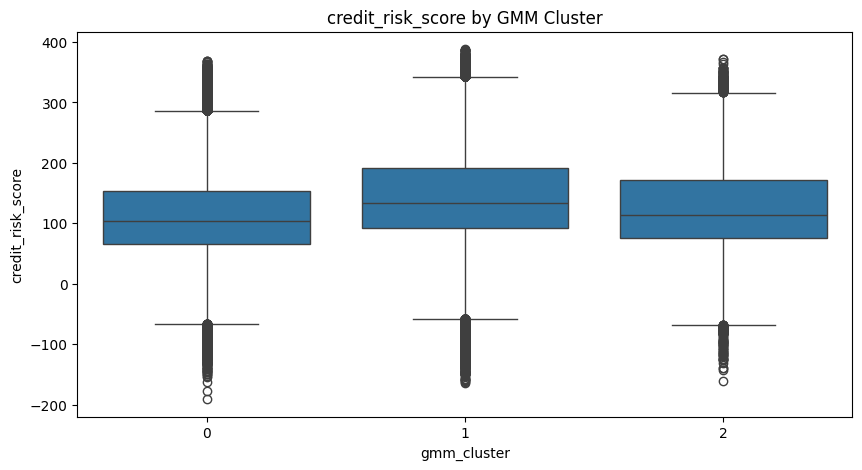

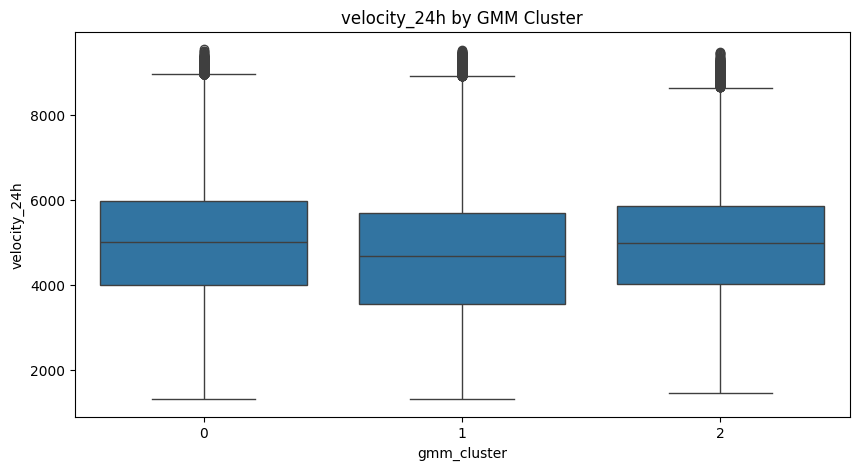

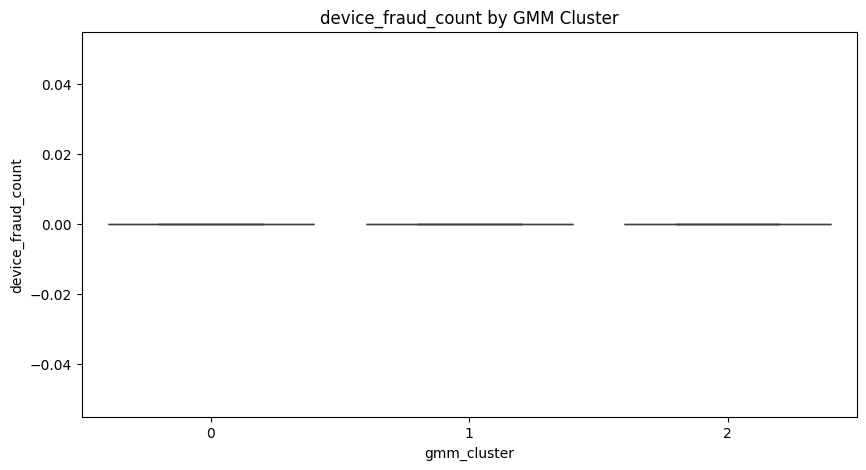

In [13]:
features_to_plot = ['credit_risk_score', 'velocity_24h', 'device_fraud_count']

for feature in features_to_plot:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x='gmm_cluster', y=feature)
    plt.title(f'{feature} by GMM Cluster')
    plt.show()

## view average values per cluster

In [14]:
cluster_summary = df.groupby('gmm_cluster').mean(numeric_only=True).T
cluster_summary = cluster_summary.round(2)
print("\nCluster Profile Summary:\n")
display(cluster_summary)


Cluster Profile Summary:



gmm_cluster,0,1,2
fraud_bool,0.01,0.01,0.02
income,0.53,0.58,0.54
name_email_similarity,0.48,0.49,0.46
prev_address_months_count,21.31,13.40,18.07
current_address_months_count,88.13,101.07,112.32
customer_age,39.50,41.33,49.19
days_since_request,5.08,0.02,2.50
intended_balcon_amount,9.76,8.44,8.18
zip_count_4w,1633.47,1554.08,1572.03
velocity_6h,6179.55,5573.88,5994.67
